<img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >

# Normality check

**The objective of this work is to check if stocks returns are normally distributed**

Import the required packages

In [32]:
import math
import pandas as pd
import numpy as np

import yfinance as yf
from pylab import plt

import scipy.stats as scs
import statsmodels.api as sm


plt.style.use('seaborn')
%matplotlib inline

Select the stocks to work

In [4]:
symbols = ["ZM", "AAPL", "MSFT"]

Download the Prices from Yahoo Finance

In [5]:
data = yf.download(symbols, start="2019-01-01", end="2020-04-30")
data = data['Close']

[*********************100%***********************]  3 of 3 completed


Calculate the daily returns

In [6]:
returns = np.log(data / data.shift(1)).dropna()
returns.head()

,AAPL,MSFT,ZM
Date,,,
2019-04-22,0.003281,0.003156,0.057964
2019-04-23,0.014320,0.013483,0.049008
2019-04-24,-0.001543,-0.003434,-0.087802
2019-04-25,-0.009117,0.032581,0.028083
2019-04-26,-0.004785,0.005713,0.018595


In [16]:
returns.columns

Index(['AAPL', 'MSFT', 'ZM'], dtype='object')

Graph the cummulative return to check the data

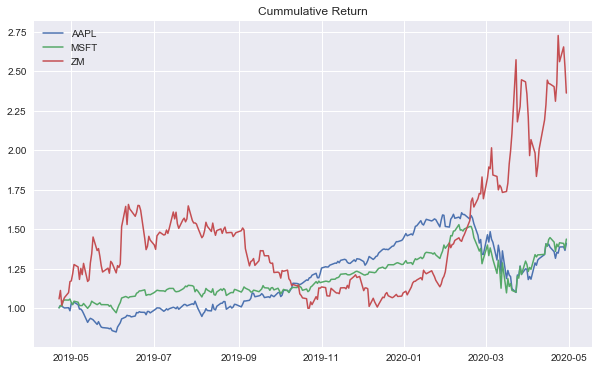

In [23]:
plt.figure(figsize=(10,6))
plt.plot(returns['AAPL'].cumsum().apply(np.exp), lw=1.5, label='AAPL')
plt.plot(returns['MSFT'].cumsum().apply(np.exp), lw=1.5, label='MSFT')
plt.plot(returns['ZM'].cumsum().apply(np.exp), lw=1.5, label='ZM')
plt.legend(loc=0)
plt.title('Cummulative Return');

Calculate the annualized return

In [6]:
returns.mean()*252

AAPL    0.335276
MSFT    0.353567
ZM      0.836518
dtype: float64

Calculate the annualized Standard Deviation

In [7]:
returns.std()*math.sqrt(252)

AAPL    0.405880
MSFT    0.397106
ZM      0.688198
dtype: float64

In [8]:
def dN(x,mu,sigma):
    '''Probability density function of a normal
    random variable
    '''
    z = (x - mu) / sigma
    pdf=np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

In [9]:
def return_histogram(name,rets):
    '''Plot a Histogram of the returns
    '''
    plt.figure(figsize=(10,6))
    x = np.linspace(min(rets), max(rets), 100)
    plt.hist(np.array(rets), bins=50, density=True)
    y = dN(x, np.mean(rets), np.std(rets))
    plt.plot(x, y, linewidth = 2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)
    title = name + " histogram of returns"
    plt.title(title)

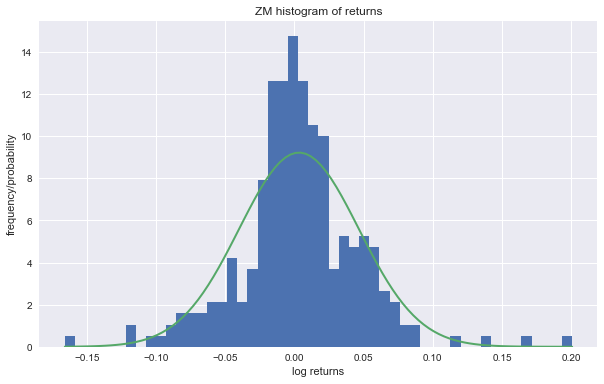

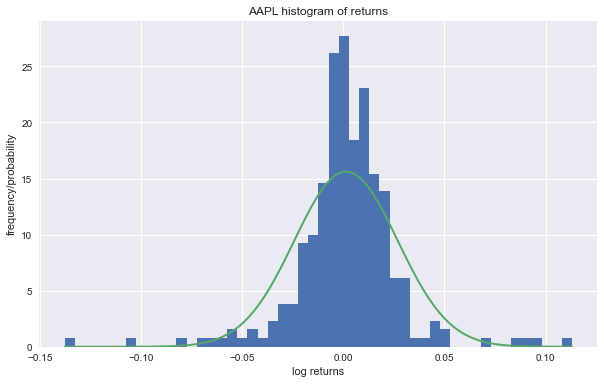

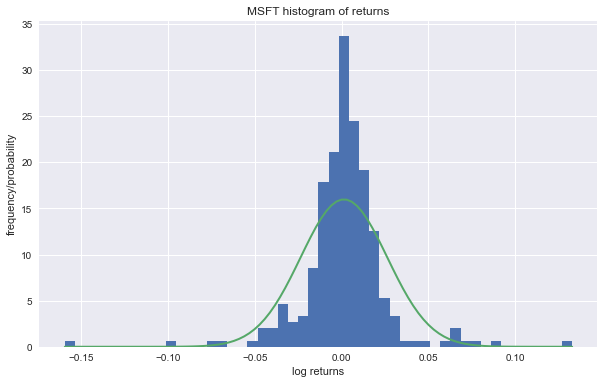

In [10]:
for sym in symbols:
    return_histogram(sym, returns[sym].values)

As we can see graphically in the charts, neither of the 3 stocks returns behave as normally distributed. They have many of the observations close to the mean and the presence of outliers at the tails, this is known as leptokurtic distribution.

>Leptokurtic distributions are distributions with kurtosis larger than that of a normal distribution. A normal distribution has kurtosis of three. Therefore, a distribution with kurtosis greater than three would be labeled a leptokurtic distribution. 

Source: https://www.investopedia.com/terms/l/leptokurtic.asp

## QQ Plot Analysis

From the QQ plot, we can check that many observations fall outside the red line. This means that many extreme observations are not in line with the theoretical normal distributed quantiles. These charts also suggest that the returns are not normally distributed.

>The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

Source: https://data.library.virginia.edu/understanding-q-q-plots/

Define function to create QQ plots

In [41]:
def return_qqplot(name,rets):
    '''Generates a Q-Q plot of the returns
    '''
    sm.qqplot(rets, line='s')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sameple Quantiles')
    title = name + " QQ plot"
    plt.title(title);

Create QQ Plots

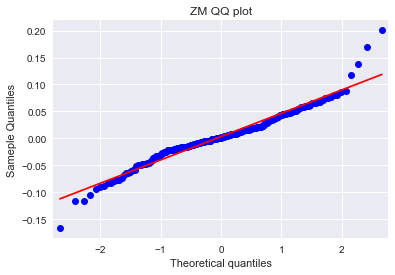

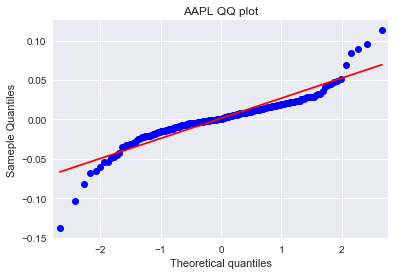

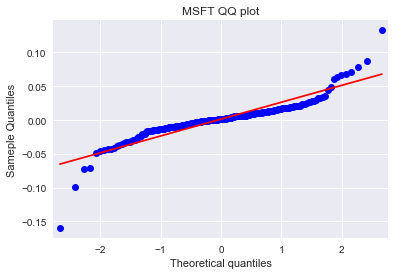

In [42]:
for sym in symbols:
    return_qqplot(sym,returns[sym].values)

## Statistical Normality Test

The next step is to define the function print_statistic to test whether the sample differs from a normal distribution. We utilized a study from the Scipy package based on D’Agostino and Pearson’s test that uses Skewness and Kurtosis.

In [13]:
def print_statistics(rets):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(rets))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(rets)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(rets))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(rets)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(rets)[1])
    print("---------------------------------------------")

Execute the function to check the Normality

In [14]:
for sym in symbols:
    print('\n{}'.format(sym))
    print(45 * '=')
    print_statistics(returns[sym].values)


ZM
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns  0.233181
Skew Normal Test p-value    0.120046
---------------------------------------------
Kurt of Sample Log Returns  2.963415
Kurt Normal Test p-value    0.000002
---------------------------------------------
Normal Test p-value         0.000003
---------------------------------------------

AAPL
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.414822
Skew Normal Test p-value    0.006953
---------------------------------------------
Kurt of Sample Log Returns  6.634998
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------

MSFT
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.457009
Skew Normal Test p-value    0.003152
---------------------------------------------
Kurt 

Finally, we did the statistical analysis to the selected stocks to formally check the normality of the returns. The 3 p-values are almost 0, this means that we can confirm that the returns are not normally distributed.

<img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >